In [1]:
from ftplib import FTP

ftp = FTP('ftp.cdc.noaa.gov')

ftp.login('anonymous', 'contraseña')  # 'usuario', 'contraseña'

ftp.cwd('Datasets/noaa.ersst/')               # Poner el directorio donde estan los datos
ftp.retrlines('LIST')           # Realiza una lista con los archivos que se encuentran

filename='sst.mnmean.v4.nc'

localfile = open(filename, 'wb') #Localfile es el nombre del archivo en la maquina local, puede ser el mismo nombre que filename o no.
ftp.retrbinary('RETR ' + filename, localfile.write, 1024)    # descarga el filename, lo descarga en localfile, velocidad de descarga           

localfile.close()

ftp.close()

NETCDF4_CLASSIC


odict_keys(['lat', 'lon', 'time_bnds', 'time', 'sst'])

In [3]:
# Abrir Netcdf 
#Mili dice que hay otra libreria que se llama gdal (ver tutorial de Basemap) 
from netCDF4 import Dataset 
import numpy as np 
nc_sst = 'sst.mnmean.v4.nc' 
dataset = Dataset(nc_sst, mode='r') #Ver tipo de netcdf 
print(dataset.file_format) 
#Dimensiones 
dataset.dimensions.keys() 
#Variables del netcdf 
dataset.variables.keys() 

NETCDF4_CLASSIC


odict_keys(['lat', 'lon', 'time_bnds', 'time', 'sst'])

In [4]:
#Ver informacion de la variable
dataset.variables['sst']

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Monthly Means of Sea Surface Temperature
    units: degC
    var_desc: Sea Surface Temperature
    level_desc: Surface
    statistic: Mean
    missing_value: -9.96921e+36
    actual_range: [ -1.79999995  33.95000076]
    valid_range: [ -5.  40.]
    dataset: NOAA Extended Reconstructed SST V4
    parent_stat: Individual Values
unlimited dimensions: time
current shape = (1951, 89, 180)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
#Ver informacion de la variable
dataset.variables['lat']

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
    long_name: Latitude
    actual_range: [ 88. -88.]
    standard_name: latitude
    axis: Y
    coordinate_defines: center
unlimited dimensions: 
current shape = (89,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [36]:
#Ver informacion de la variable
dataset.variables['lon']

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [   0.  358.]
    standard_name: longitude
    axis: X
    coordinate_defines: center
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [6]:
# EXtraemos las variables

lons = dataset.variables['lon'][:]
lats = dataset.variables['lat'][:]
sst = dataset.variables['sst'][:]
time = dataset.variables['time'][:]

dataset.close() # Cierra netcdf

01-February-1854


/home/ines/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


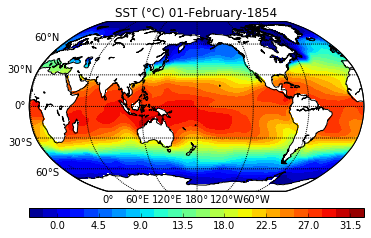

In [38]:
# Pasar a fecha calendario
import datetime

day = time[1]
date = datetime.datetime(1800, 1, 1) + datetime.timedelta(day) #This assumes that the year is 2007

#Pasamos al formato que queremos (buscar documentación strftime)
fecha=date.strftime("%d-%B-%Y")
print(fecha)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#Con esto muestra el gráfico dentro de esta pantalla y no aparte
%matplotlib inline

# create Basemap instance for Robinson projection.
m = Basemap(projection='robin',lon_0=0.5*(lons[0]+lons[-1]))
# compute map projection coordinates for lat/lon grid.
x, y = m(*np.meshgrid(lons,lats))
# make filled contour plot.
cs = m.contourf(x,y,sst[1,:,:],30,cmap=plt.cm.jet)
m.drawcoastlines() # draw coastlines
m.drawmapboundary() # draw a line around the map region
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) # draw meridians
plt.title('SST (°C) ' + fecha) # add a title
cbar = m.colorbar(cs, location='bottom', pad="10%") #Agregamos la barra de colores
plt.show()



In [ ]:
# conda install -c https://conda.anaconda.org/ajdawson eofs
# Instala algo que no esta en el respositorio de conda, entonces los buscamos via web. 
# REPOSITORIO --> https://conda.anaconda.org/ajdawson
# LIBRERIA --> eofs
#
# http://ajdawson.github.io/eofs/examples/elnino_standard.html

In [9]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np


from eofs.standard import Eof
from eofs.examples import example_data_path

%matplotlib inline

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.

#Realiza un EOF con peso segun la latitud

coslat = np.cos(np.deg2rad(lats)) # Pasa de grado a radianes
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

/home/ines/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


/home/ines/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


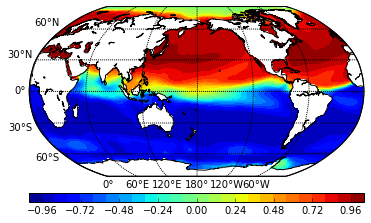

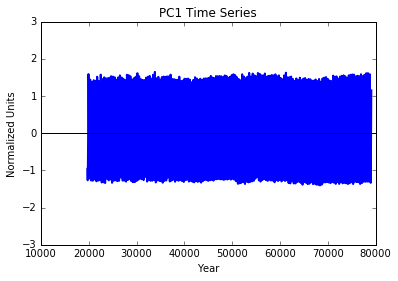

In [20]:
from mpl_toolkits.basemap import Basemap

# create Basemap instance for Robinson projection.
m = Basemap(projection='robin',lon_0=0.5*(lons[0]+lons[-1]))
# compute map projection coordinates for lat/lon grid.
x, y = m(*np.meshgrid(lons,lats))
# make filled contour plot.
cs = m.contourf(x,y,eof1.squeeze(),30,cmap=plt.cm.jet)
m.drawcoastlines() # draw coastlines
m.drawmapboundary() # draw a line around the map region
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) # draw meridians
cbar = m.colorbar(cs, location='bottom', pad="10%") #Agregamos la barra de colores
plt.show()

# Plot the leading PC time series.
plt.figure()
#years = range(1954, 2015)

plt.plot(time, pc1, color='b', linewidth=2)
plt.axhline(0, color='k')
plt.title('PC1 Time Series')
plt.xlabel('Year')
plt.ylabel('Normalized Units')
#plt.xlim(1962, 2012)
plt.ylim(-3, 3)

plt.show()